In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("placement-dataset.csv")
df

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [3]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       92 non-null     float64
 1   iq         96 non-null     float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       88 non-null     float64
 1   iq         88 non-null     float64
 2   placement  88 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


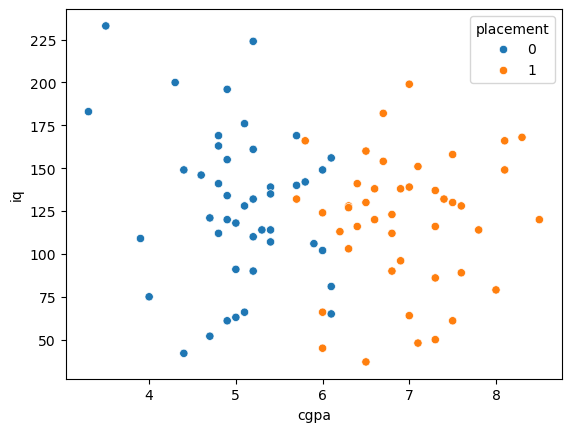

In [6]:
sns.scatterplot(x="cgpa",y="iq",data=df,hue="placement")
plt.show()

In [7]:
x=df.iloc[:,0:2]
y=df.iloc[:,2:]

In [8]:
x.shape
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
3,7.4,132.0
4,5.8,142.0
5,7.1,48.0


In [9]:
y.head()

,placement
0,1
1,0
3,1
4,0
5,1


In [10]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [11]:
y_test

,placement
85,1
54,1
38,1
70,1
64,1
68,0
90,1
75,0
35,1


In [12]:
#preprocessing data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [13]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
#model train
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
y=clf.predict(x_test)

In [16]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y,y_test)

0.8888888888888888

<Axes: >

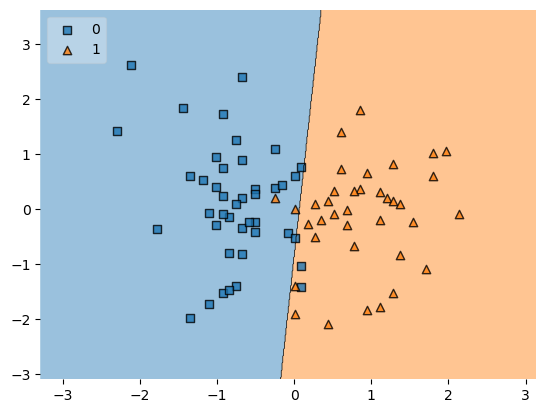

In [18]:
#plotting graph of model by mlx plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values.ravel(),clf=clf,legend=2)